<a href="https://colab.research.google.com/github/Aromer9/taller_IA/blob/main/Detalle_NTC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto NTC

#1. Reading Data

In [ ]:
import pandas as pd

In [ ]:
url_data= {
  "enero": 'https://drive.google.com/file/d/1SJ0kih8e3Oy9J1I478m1dNJCK9yayxac/view?usp=share_link',
  "febrero":'https://drive.google.com/file/d/1gwrqO0ZZJyAs3Q99zKYtl0KDMZhOtgvv/view?usp=share_link',
  "marzo":'https://drive.google.com/file/d/1kU0celF2FUqsn0HI2sg6RUelPwCslTp9/view?usp=share_link'

}

In [ ]:
# get all files
for url in url_data.values():
  id = url.split("/")[5]
  !gdown $id

Downloading...
From: https://drive.google.com/uc?id=1SJ0kih8e3Oy9J1I478m1dNJCK9yayxac
To: /content/csv_enero_23_det.csv
100% 15.3M/15.3M [00:00<00:00, 128MB/s]
Downloading...
From: https://drive.google.com/uc?id=1gwrqO0ZZJyAs3Q99zKYtl0KDMZhOtgvv
To: /content/csv_febrero_23_det.csv
100% 15.2M/15.2M [00:00<00:00, 60.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1kU0celF2FUqsn0HI2sg6RUelPwCslTp9
To: /content/csv_marzo_23_det.csv
100% 18.2M/18.2M [00:00<00:00, 159MB/s]


In [ ]:
df = pd.read_csv("csv_enero_23_det.csv")
df2 = pd.read_csv("csv_febrero_23_det.csv")
df3 = pd.read_csv("csv_marzo_23_det.csv")

In [ ]:
df = df.append(df2)

<ipython-input-22-fb89c00654ab>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


In [ ]:
df = df.append(df3)

<ipython-input-23-3ecbe746564b>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df3)


#2. Data Understanding

In [ ]:
df.head()

,trx_date,store_nbr,hour_nbr,trxhora,terminal,terminal_type,formato,comuna,sales_unit_qty,sales_retail_amt,trx_id,scan_time,tender_time,inactive_time
0,2023-01-02,55,14,1442,4,POS,819 LIDER,MACUL,24.00,42891,55230102004016942,86.0,36.0,11.0
1,2023-01-04,229,11,1130,3,POS,200 EXPRESS 400,MACUL,27.98,29796,229230104003004930,64.0,30.0,15.0
2,2023-01-04,498,17,1758,1,POS,200 EXPRESS 400,MACUL,24.00,15688,498230104001021658,56.0,25.0,19.0
3,2023-01-02,55,18,1825,3,POS,819 LIDER,MACUL,1.00,2092,55230102003017625,1.0,30.0,11.0
4,2023-01-04,229,13,1350,4,POS,200 EXPRESS 400,MACUL,2.00,2269,229230104004002550,4.0,20.0,15.0


Estadistica básica del dataset

In [ ]:
df.describe()

,store_nbr,hour_nbr,trxhora,terminal,sales_unit_qty,sales_retail_amt,trx_id,scan_time,tender_time,inactive_time
count,519644.000000,519644.000000,519644.000000,519644.000000,519644.000000,519644.000000,5.196440e+05,519644.000000,519644.000000,519644.000000
mean,132.814219,15.222716,1551.765547,28.883386,14.346919,20567.210912,1.330444e+17,48.990117,34.593994,18.802568
std,147.461744,3.559250,354.972722,35.645776,20.177636,28415.370411,1.474617e+17,49.811598,12.275733,10.159697
min,55.000000,6.000000,639.000000,1.000000,0.020000,1.000000,5.523010e+16,1.000000,0.000000,0.000000
25%,55.000000,12.000000,1246.000000,3.000000,3.000000,4697.000000,5.523020e+16,13.000000,26.000000,10.000000
50%,55.000000,15.000000,1545.000000,12.000000,7.000000,10832.000000,5.523031e+16,31.000000,35.000000,18.000000
75%,229.000000,18.000000,1858.000000,85.000000,17.000000,24451.000000,2.292301e+17,66.000000,45.000000,28.000000
max,498.000000,22.000000,2224.000000,94.000000,672.000000,662881.000000,4.982303e+17,215.400000,56.000000,41.000000


Columnas del dataset

In [ ]:
list(df.columns)

['trx_date',
 'store_nbr',
 'hour_nbr',
 'trxhora',
 'terminal',
 'terminal_type',
 'formato',
 'comuna',
 'sales_unit_qty',
 'sales_retail_amt',
 'trx_id',
 'scan_time',
 'tender_time',
 'inactive_time']

Dimensiones del Dataset

In [ ]:
df.shape

(519644, 14)

Detección NaN values

In [ ]:
df_n = df.copy()

In [ ]:
df_na = df[df.isna().any(axis=1)]

In [ ]:
df_na.head()

,trx_date,store_nbr,hour_nbr,trxhora,terminal,terminal_type,formato,comuna,sales_unit_qty,sales_retail_amt,trx_id,scan_time,tender_time,inactive_time


In [ ]:
#df_na.shape

Análisis de la agregación de los datos:

In [ ]:
#df_55 = df[(df["trx_date"] == '2023-01-29') & (df["store_nbr"] == 55) & (df["hour_nbr"] == 19) & (df["terminal_type"] == 'POS')] #& (df["terminal"] == 12)
df_55 = df[(df["store_nbr"] == 55)]
filter = df_55["trx_date"].isin(['2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08', '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12', '2023-01-15', '2023-01-14', '2023-01-14', '2023-01-15', '2023-01-16', '2023-01-17'])
df_55 = df_55[filter]

df_55 = df_55.sort_values(['trx_date', 'terminal','trxhora'])
df_55.head(50)



#El orden de las variables importa (Sort) ya que permite calcular métricas en función de hora y terminal

,trx_date,store_nbr,hour_nbr,trxhora,terminal,terminal_type,formato,comuna,sales_unit_qty,sales_retail_amt,trx_id,scan_time,tender_time,inactive_time
4344,2023-01-02,55,10,1029,3,POS,819 LIDER,MACUL,5.00,16110,55230102003000229,15.0,50.0,27.0
6792,2023-01-02,55,10,1034,3,POS,819 LIDER,MACUL,1.00,21000,55230102003000334,1.0,50.0,34.0
5661,2023-01-02,55,10,1036,3,POS,819 LIDER,MACUL,6.00,17009,55230102003000436,16.0,37.0,26.0
3840,2023-01-02,55,10,1044,3,POS,819 LIDER,MACUL,5.00,10093,55230102003000544,13.0,13.0,34.0
7155,2023-01-02,55,10,1045,3,POS,819 LIDER,MACUL,16.00,39430,55230102003000645,47.0,40.0,34.0
94100,2023-01-02,55,10,1048,3,POS,819 LIDER,MACUL,66.00,76789,55230102003000748,179.0,34.0,34.0
1599,2023-01-02,55,10,1055,3,POS,819 LIDER,MACUL,3.52,7918,55230102003000955,8.0,27.0,17.0
5628,2023-01-02,55,10,1055,3,POS,819 LIDER,MACUL,2.00,2605,55230102003000855,11.0,17.0,34.0
1335,2023-01-02,55,10,1056,3,POS,819 LIDER,MACUL,7.00,8529,55230102003001056,20.0,29.0,31.0
4968,2023-01-02,55,10,1057,3,POS,819 LIDER,MACUL,20.25,27681,55230102003001157,143.0,50.0,13.0


**Creación de nuevas dimensiones**

In [ ]:
df_55['time_total'] = df_55['scan_time'] + df_55['tender_time'] + df_55['inactive_time']
df_55['min_diff'] = df_55['time_total'] / 60
df_55['tipo_carro'] = 1
df_55['alert_time'] = 0
df_55['alert_time_max'] = 1

**Se crea nuevo atributo "Tipo Carro" en función de data**

In [ ]:
carro_express='00-express'
carro_chico='01-chico'
carro_mediano='02-mediano'
carro_grande='03-grande'
carro_muy_grande='04-muygrande'
rr=[]
for i in range(len(df_55)):
    val = df_55.iloc[i]['sales_unit_qty']
    #print(val)
    if val < 8:
      value = '00-express'
      #print(value)
    if val > 8 < 20:
      value = '01-chico'
      #print(value)
    if val > 20 < 38:
      value = '02-mediano'
      #print(value)
    if val > 38 < 68:
      value = '03-grande'
      #print(value)
    if val >= 68.0:
      value = '04-muygrande'
      #print(value)
    rr.append(value)
#print(rr)

for i in range(len(df_55)):
    df_55['tipo_carro'] = rr

In [ ]:
df_55.head(30)

,trx_date,store_nbr,hour_nbr,trxhora,terminal,terminal_type,formato,comuna,sales_unit_qty,sales_retail_amt,trx_id,scan_time,tender_time,inactive_time,time_total,min_diff,tipo_carro,alert_time,alert_time_max
4344,2023-01-02,55,10,1029,3,POS,819 LIDER,MACUL,5.00,16110,55230102003000229,15.0,50.0,27.0,92.0,1.533333,00-express,0,1
6792,2023-01-02,55,10,1034,3,POS,819 LIDER,MACUL,1.00,21000,55230102003000334,1.0,50.0,34.0,85.0,1.416667,00-express,0,1
5661,2023-01-02,55,10,1036,3,POS,819 LIDER,MACUL,6.00,17009,55230102003000436,16.0,37.0,26.0,79.0,1.316667,00-express,0,1
3840,2023-01-02,55,10,1044,3,POS,819 LIDER,MACUL,5.00,10093,55230102003000544,13.0,13.0,34.0,60.0,1.000000,00-express,0,1
7155,2023-01-02,55,10,1045,3,POS,819 LIDER,MACUL,16.00,39430,55230102003000645,47.0,40.0,34.0,121.0,2.016667,01-chico,0,1
94100,2023-01-02,55,10,1048,3,POS,819 LIDER,MACUL,66.00,76789,55230102003000748,179.0,34.0,34.0,247.0,4.116667,03-grande,0,1
1599,2023-01-02,55,10,1055,3,POS,819 LIDER,MACUL,3.52,7918,55230102003000955,8.0,27.0,17.0,52.0,0.866667,00-express,0,1
5628,2023-01-02,55,10,1055,3,POS,819 LIDER,MACUL,2.00,2605,55230102003000855,11.0,17.0,34.0,62.0,1.033333,00-express,0,1
1335,2023-01-02,55,10,1056,3,POS,819 LIDER,MACUL,7.00,8529,55230102003001056,20.0,29.0,31.0,80.0,1.333333,00-express,0,1
4968,2023-01-02,55,10,1057,3,POS,819 LIDER,MACUL,20.25,27681,55230102003001157,143.0,50.0,13.0,206.0,3.433333,02-mediano,0,1


**Se crea atributo "Alert_time", 1 cuando supera los tiempos establecidos para cada tipo de carro, y un 0 cuando no los supera**

In [ ]:
val_express=1.51
val_chico=1.86
val_mediano=2.51
val_grande=3.77
val_muy_grande=5.02

lista=[]
for i in range(len(df_55)):
    carro = df_55.iloc[i]['tipo_carro']
    val = df_55.iloc[i]['min_diff']
    if carro == carro_express:
      if val > val_express:
        value = '1'
      else:
        value = '0'
    if carro == carro_chico:
      if val > val_chico:
        value = '1'
      else:
        value = '0'
    if carro == carro_mediano:
      if val > val_mediano:
        value = '1'
      else:
        value = '0'
    if carro == carro_grande:
      if val > val_grande:
        value = '1'
      else:
        value = '0'
    if carro == carro_muy_grande:
      if val > val_muy_grande:
        value = '1'
      else:
        value = '0'

    lista.append(value)
#print(lista)

for i in range(len(df_55)):
    df_55['alert_time'] = lista


#1 = Supera
#0 = No Supera

In [ ]:
df_55.head(60)

,trx_date,store_nbr,hour_nbr,trxhora,terminal,terminal_type,formato,comuna,sales_unit_qty,sales_retail_amt,trx_id,scan_time,tender_time,inactive_time,time_total,min_diff,tipo_carro,alert_time,alert_time_max
4344,2023-01-02,55,10,1029,3,POS,819 LIDER,MACUL,5.00,16110,55230102003000229,15.0,50.0,27.0,92.0,1.533333,00-express,1,1
6792,2023-01-02,55,10,1034,3,POS,819 LIDER,MACUL,1.00,21000,55230102003000334,1.0,50.0,34.0,85.0,1.416667,00-express,0,1
5661,2023-01-02,55,10,1036,3,POS,819 LIDER,MACUL,6.00,17009,55230102003000436,16.0,37.0,26.0,79.0,1.316667,00-express,0,1
3840,2023-01-02,55,10,1044,3,POS,819 LIDER,MACUL,5.00,10093,55230102003000544,13.0,13.0,34.0,60.0,1.000000,00-express,0,1
7155,2023-01-02,55,10,1045,3,POS,819 LIDER,MACUL,16.00,39430,55230102003000645,47.0,40.0,34.0,121.0,2.016667,01-chico,1,1
94100,2023-01-02,55,10,1048,3,POS,819 LIDER,MACUL,66.00,76789,55230102003000748,179.0,34.0,34.0,247.0,4.116667,03-grande,1,1
1599,2023-01-02,55,10,1055,3,POS,819 LIDER,MACUL,3.52,7918,55230102003000955,8.0,27.0,17.0,52.0,0.866667,00-express,0,1
5628,2023-01-02,55,10,1055,3,POS,819 LIDER,MACUL,2.00,2605,55230102003000855,11.0,17.0,34.0,62.0,1.033333,00-express,0,1
1335,2023-01-02,55,10,1056,3,POS,819 LIDER,MACUL,7.00,8529,55230102003001056,20.0,29.0,31.0,80.0,1.333333,00-express,0,1
4968,2023-01-02,55,10,1057,3,POS,819 LIDER,MACUL,20.25,27681,55230102003001157,143.0,50.0,13.0,206.0,3.433333,02-mediano,1,1


**Se crea atributo "Alert_time_max", 1 cuando supera los tiempos MAXIMOS establecidos para los clientes, 1 cuando lo supera, y un 0 cuando no los supera**

In [ ]:
val_max_lider=7.62
val_max_express=6.91
val_max_sba=8.47
val_max_e400=3.32
val_max_mayorista=24.93

lider='819  LIDER'
express='826  EXPRESS'
e400='200  EKONO'
val=''

lista=[]
for i in range(len(df_55)):
    val = df_55.iloc[i]['min_diff']
    format = df_55.iloc[i]['formato']
    if format == lider:
      if val > val_max_lider:
        value = '1'
      else:
        value = '0'
    if format == express:
      if val > val_max_express:
        value = '1'
      else:
        value = '0'
    if format == e400:
      if val > val_max_e400:
        value = '1'
      else:
        value = '0'

    lista.append(value)
#print(lista)

for i in range(len(df_55)):
    df_55['alert_time_max'] = lista


#1 = Supera
#0 = No Supera

In [ ]:
#df_55 = df[(df["trx_date"] == '2023-01-02') & (df["hour_nbr"] == 13) & (df["terminal"] == 3) & (df["store_nbr"] == 55)]
df_55 = df_55.sort_values(['trx_date', 'terminal','trxhora'])
df_55.head(60)

,trx_date,store_nbr,hour_nbr,trxhora,terminal,terminal_type,formato,comuna,sales_unit_qty,sales_retail_amt,trx_id,scan_time,tender_time,inactive_time,time_total,min_diff,tipo_carro,alert_time,alert_time_max
4344,2023-01-02,55,10,1029,3,POS,819 LIDER,MACUL,5.00,16110,55230102003000229,15.0,50.0,27.0,92.0,1.533333,00-express,1,0
6792,2023-01-02,55,10,1034,3,POS,819 LIDER,MACUL,1.00,21000,55230102003000334,1.0,50.0,34.0,85.0,1.416667,00-express,0,0
5661,2023-01-02,55,10,1036,3,POS,819 LIDER,MACUL,6.00,17009,55230102003000436,16.0,37.0,26.0,79.0,1.316667,00-express,0,0
3840,2023-01-02,55,10,1044,3,POS,819 LIDER,MACUL,5.00,10093,55230102003000544,13.0,13.0,34.0,60.0,1.000000,00-express,0,0
7155,2023-01-02,55,10,1045,3,POS,819 LIDER,MACUL,16.00,39430,55230102003000645,47.0,40.0,34.0,121.0,2.016667,01-chico,1,0
94100,2023-01-02,55,10,1048,3,POS,819 LIDER,MACUL,66.00,76789,55230102003000748,179.0,34.0,34.0,247.0,4.116667,03-grande,1,0
1599,2023-01-02,55,10,1055,3,POS,819 LIDER,MACUL,3.52,7918,55230102003000955,8.0,27.0,17.0,52.0,0.866667,00-express,0,0
5628,2023-01-02,55,10,1055,3,POS,819 LIDER,MACUL,2.00,2605,55230102003000855,11.0,17.0,34.0,62.0,1.033333,00-express,0,0
1335,2023-01-02,55,10,1056,3,POS,819 LIDER,MACUL,7.00,8529,55230102003001056,20.0,29.0,31.0,80.0,1.333333,00-express,0,0
4968,2023-01-02,55,10,1057,3,POS,819 LIDER,MACUL,20.25,27681,55230102003001157,143.0,50.0,13.0,206.0,3.433333,02-mediano,1,0


**Se crea atributo "jeg_caja" con la información de cuantas cajeras hay por hora**

In [ ]:
lista=[]
term=1
for i in range(len(df_55)):
      horaaux=''
      terminalaux=''
      if i == 0:
        hora = df_55.iloc[i]['hour_nbr']
        terminal = df_55.iloc[i]['terminal']
        fec = df_55.iloc[i]['trx_date']
        term==term
        #print(term)
      else:
        #print({i})
        horaaux=hora
        terminalaux=terminal
        fecaux=fec
        hora = df_55.iloc[i]['hour_nbr']
        terminal = df_55.iloc[i]['terminal']
        fec = df_55.iloc[i]['trx_date']

        if fec == fecaux:
          if hora == horaaux:
            #print('Horaigual')

            if terminal == terminalaux:
              #print('terminal igual')
              term==term
              term=0
              #print(term)
            elif terminal != terminalaux:
              #print('terminal distinto')
              term=1
              #print(term)
              #term=term
          else: # mejorar código, podría preguntar si hora es distinta y despues si día es distinto
            term=1
        if fec != fecaux:
          term=1

      lista.append(term)

for i in range(len(df_55)):
    df_55['jeg_caja'] = lista

#df_55.groupby(['hour_nbr'])['terminal'].nunique() === 8 cajeras

In [ ]:
df_55.head(60)

,trx_date,store_nbr,hour_nbr,trxhora,terminal,terminal_type,formato,comuna,sales_unit_qty,sales_retail_amt,trx_id,scan_time,tender_time,inactive_time,time_total,min_diff,tipo_carro,alert_time,alert_time_max,jeg_caja
4344,2023-01-02,55,10,1029,3,POS,819 LIDER,MACUL,5.00,16110,55230102003000229,15.0,50.0,27.0,92.0,1.533333,00-express,1,0,1
6792,2023-01-02,55,10,1034,3,POS,819 LIDER,MACUL,1.00,21000,55230102003000334,1.0,50.0,34.0,85.0,1.416667,00-express,0,0,0
5661,2023-01-02,55,10,1036,3,POS,819 LIDER,MACUL,6.00,17009,55230102003000436,16.0,37.0,26.0,79.0,1.316667,00-express,0,0,0
3840,2023-01-02,55,10,1044,3,POS,819 LIDER,MACUL,5.00,10093,55230102003000544,13.0,13.0,34.0,60.0,1.000000,00-express,0,0,0
7155,2023-01-02,55,10,1045,3,POS,819 LIDER,MACUL,16.00,39430,55230102003000645,47.0,40.0,34.0,121.0,2.016667,01-chico,1,0,0
94100,2023-01-02,55,10,1048,3,POS,819 LIDER,MACUL,66.00,76789,55230102003000748,179.0,34.0,34.0,247.0,4.116667,03-grande,1,0,0
1599,2023-01-02,55,10,1055,3,POS,819 LIDER,MACUL,3.52,7918,55230102003000955,8.0,27.0,17.0,52.0,0.866667,00-express,0,0,0
5628,2023-01-02,55,10,1055,3,POS,819 LIDER,MACUL,2.00,2605,55230102003000855,11.0,17.0,34.0,62.0,1.033333,00-express,0,0,0
1335,2023-01-02,55,10,1056,3,POS,819 LIDER,MACUL,7.00,8529,55230102003001056,20.0,29.0,31.0,80.0,1.333333,00-express,0,0,0
4968,2023-01-02,55,10,1057,3,POS,819 LIDER,MACUL,20.25,27681,55230102003001157,143.0,50.0,13.0,206.0,3.433333,02-mediano,1,0,0


**Se crea atributo "dayweek" con la descripción del día de la semana**

In [ ]:
from datetime import date
from datetime import datetime
import datetime
import calendar

lista=[]
for i in range(len(df_55)):
    fecha = df_55.iloc[i]['trx_date']
    fecha = pd.to_datetime(fecha)
    fecha_dt = calendar.day_name[fecha.weekday()]

    lista.append(fecha_dt)

for i in range(len(df_55)):
    df_55['day_week'] = lista

In [ ]:
#df_55.to_excel('data_df_55.xlsx')

#3. Visualitations

**Distribución de transacciones por dia de la semana**

In [ ]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
from matplotlib import pyplot as plt

<ipython-input-45-77ee24695e01>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)


Text(0.5, 1.0, 'Distribución de transacciones por fecha local 55')

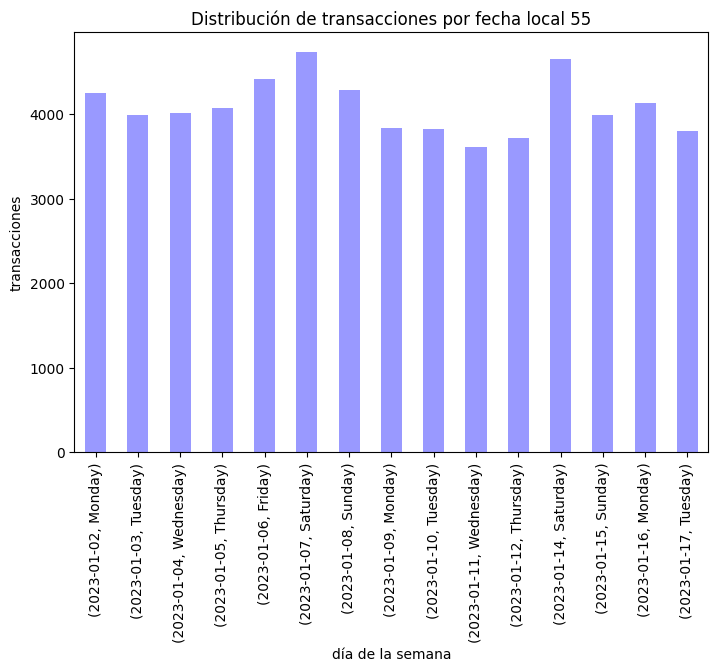

In [ ]:
df_55_trx = df_55.groupby(['trx_date', 'day_week']).count()['trx_id']

fig, axs = plt.subplots(1, 1, figsize=(18, 12))
#ax.set_title('Distribución de transacciones por hora')

#Plot 1
plt.subplot(2,2,1)
df_55_trx.plot.bar(alpha= 0.4, color='b', ylabel='transacciones', xlabel='día de la semana')
plt.title('Distribución de transacciones por fecha local 55')

**Distribución de transacciones por hora**

<ipython-input-46-48c0f643c1b7>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)


Text(0.5, 1.0, 'Distribución de transacciones por fecha local 55')

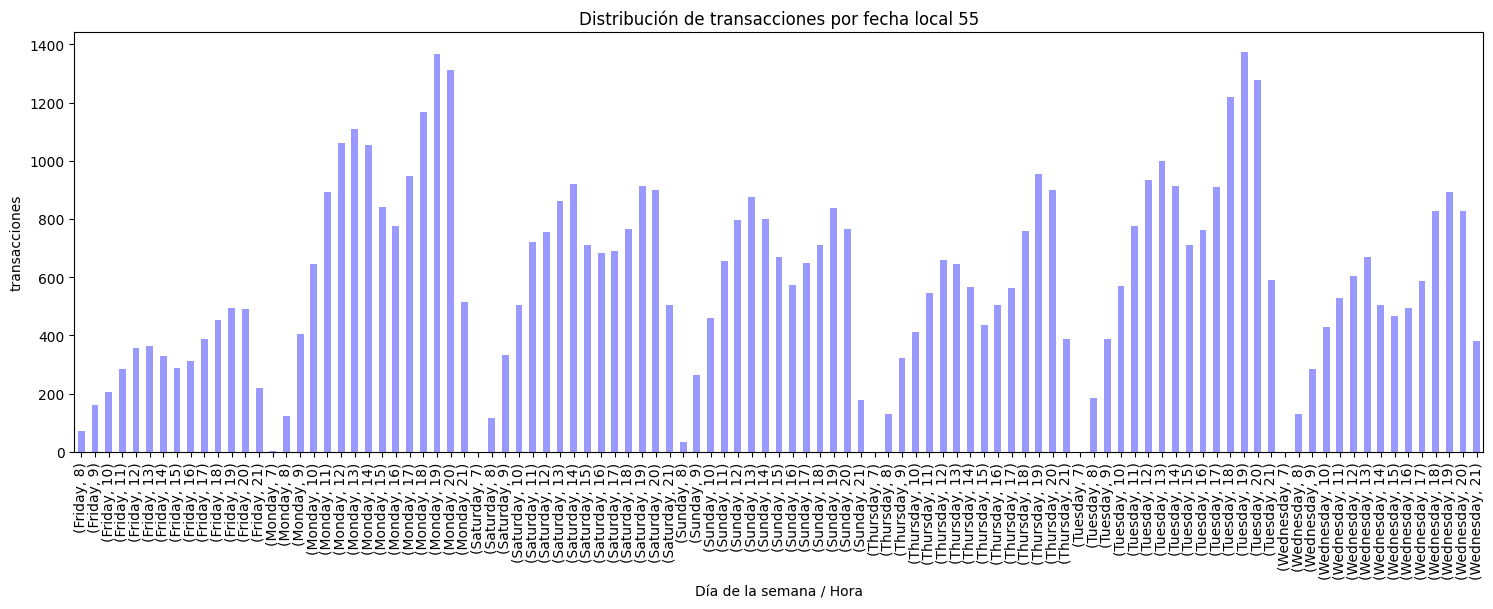

In [ ]:
df_55_trx = df_55.groupby(['day_week','hour_nbr']).count()['trx_id']

fig, axs = plt.subplots(1, 1, figsize=(40, 12))
#ax.set_title('Distribución de transacciones por hora')

#Plot 1
plt.subplot(2,2,1)
df_55_trx.plot.bar(alpha= 0.4, color='b', ylabel='transacciones', xlabel='Día de la semana / Hora')
plt.title('Distribución de transacciones por fecha local 55')

Observaciones gráfico **Distribución de transacciones por dia de la semana**
* Existen 2 peak de ventas al día. El primero se registra en horario de almuerzo (13:00 / 14:00 Hrs) y el segundo se registra en la tarde (19:00 / 20:00 hrs).
* Se registra la curva mas baja a las 15:00 / 16:00 hrs
* Lunes y Domingo se genera Peak de venta en horario de Almuerzo
* Martes, miercoles, Jueves, Viernes, Sábado, Peak de venta en horario de Tarde

**Distribución de transacciones y cantidad de cajas en lineal de cajas por hora**

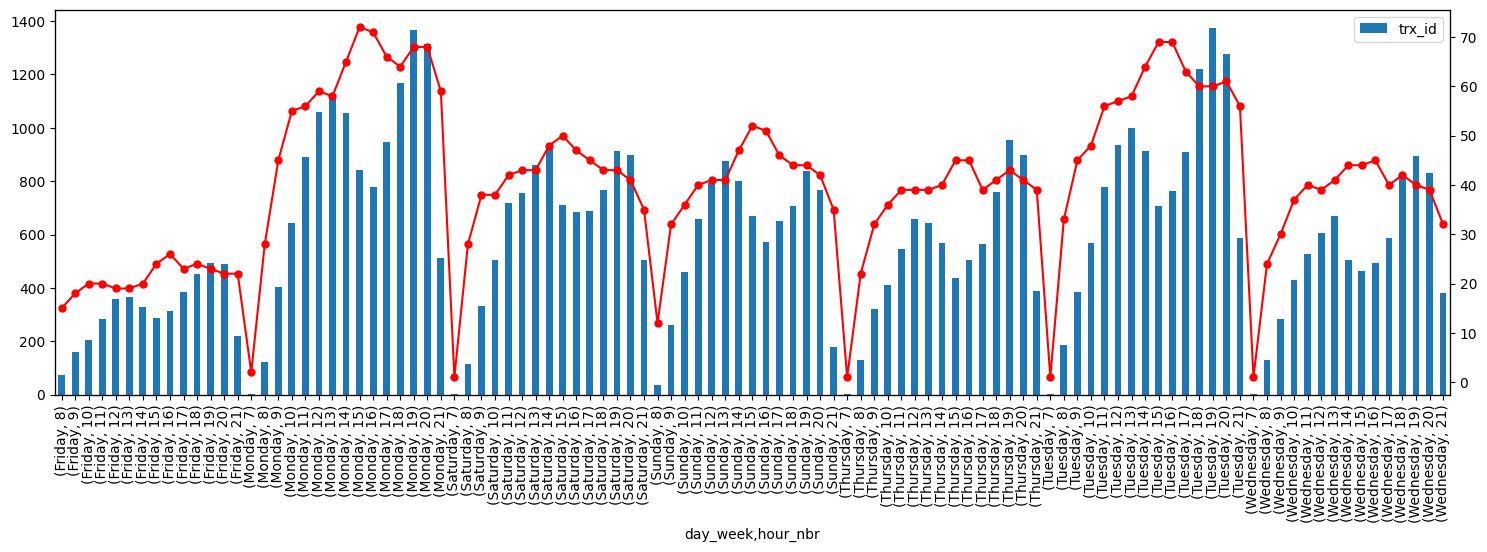

In [ ]:
df_55_week1 = df_55.groupby(['day_week', 'hour_nbr']).count()['trx_id']
df_55_week1

df_55_week2 = df_55.groupby(['day_week', 'hour_nbr']).sum()['jeg_caja']
df_55_week2

%matplotlib inline
from matplotlib import pyplot as plt

fig0, ax0 = plt.subplots(figsize=(18, 5))
ax1 = ax0.twinx()

df_55_week1.plot(kind='bar', stacked=True, ax=ax0, label='trx_id')
ax0.legend(loc ="upper left")
df_55_week2.plot(color="red", ax=ax1, marker = "o", markersize = 5, secondary_y=True, label='jeg_caja')
ax0.legend(loc ="upper right")
plt.show()





In [ ]:
df_55.groupby(['day_week', 'hour_nbr', 'terminal_type']).sum()['jeg_caja']

day_week   hour_nbr  terminal_type
Friday     8         POS               5
                     SCO              10
           9         POS               8
                     SCO              10
           10        POS              10
                                      ..
Wednesday  19        SCO              20
           20        POS              19
                     SCO              20
           21        POS              16
                     SCO              16
Name: jeg_caja, Length: 202, dtype: int64

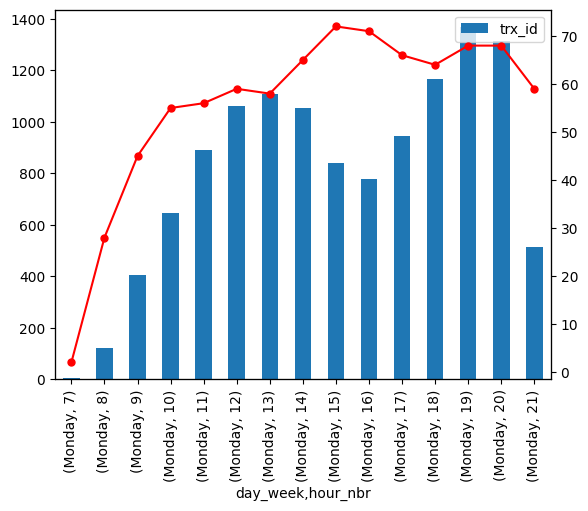

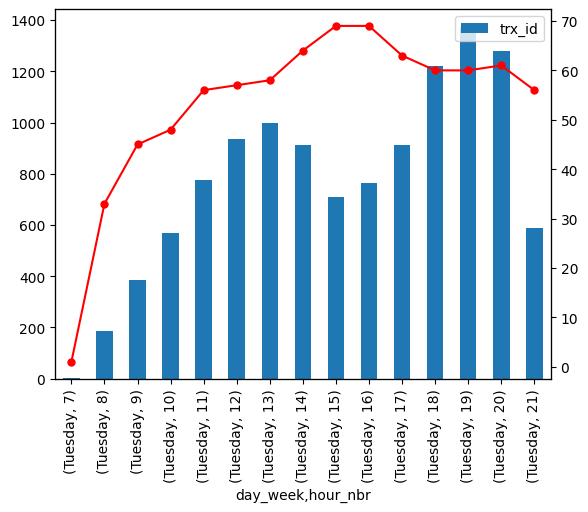

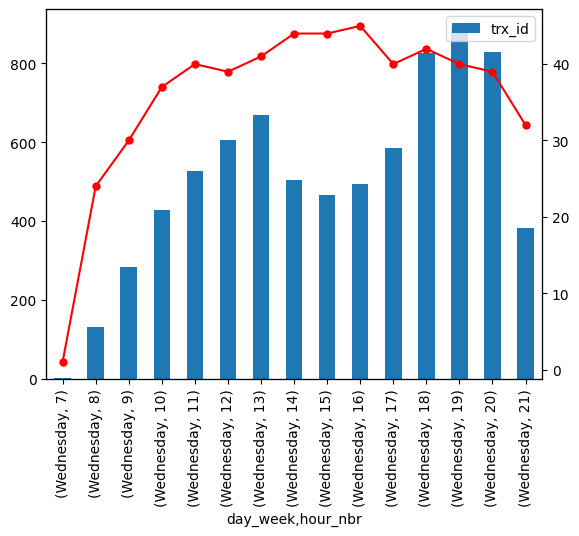

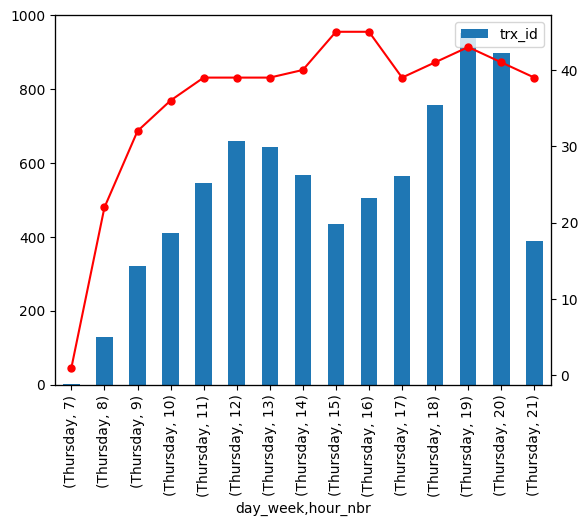

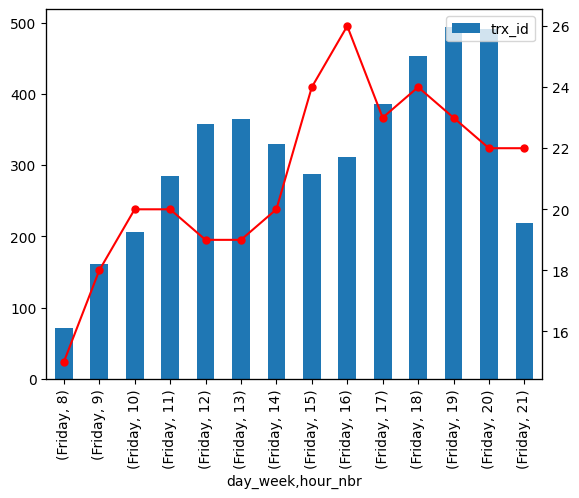

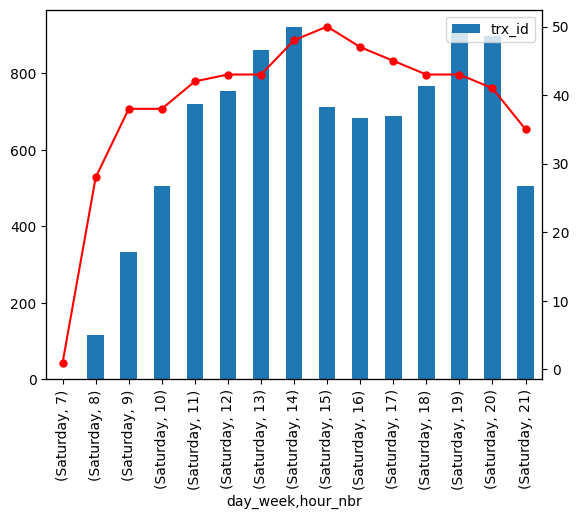

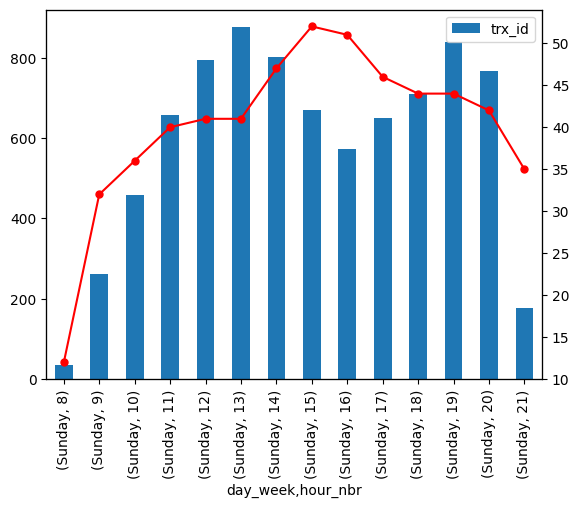

In [ ]:
##Lunes
df_55_monday = df_55[(df_55["day_week"] == "Monday")]

df_55_mo_1 = df_55_monday.groupby(['day_week', 'hour_nbr']).count()['trx_id']
df_55_mo_2 = df_55_monday.groupby(['day_week', 'hour_nbr']).sum()['jeg_caja']


fig0, ax0 = plt.subplots()
ax1 = ax0.twinx()

df_55_mo_1.plot(kind='bar', stacked=True, ax=ax0, label='trx_id')
ax0.legend(loc ="upper left")
df_55_mo_2.plot(color="red", ax=ax1, marker = "o", markersize = 5, secondary_y=True, label='jeg_caja')
ax0.legend(loc ="upper right")
plt.show()



##Martes
df_55_Tuesday = df_55[(df_55["day_week"] == "Tuesday")]

df_55_tu_1 = df_55_Tuesday.groupby(['day_week', 'hour_nbr']).count()['trx_id']
df_55_tu_2 = df_55_Tuesday.groupby(['day_week', 'hour_nbr']).sum()['jeg_caja']


fig0, ax0 = plt.subplots()
ax1 = ax0.twinx()

df_55_tu_1.plot(kind='bar', stacked=True, ax=ax0, label='trx_id')
ax0.legend(loc ="upper left")
df_55_tu_2.plot(color="red", ax=ax1, marker = "o", markersize = 5, secondary_y=True, label='jeg_caja')
ax0.legend(loc ="upper right")
plt.show()



##Miercoles
df_55_Wednesday = df_55[(df_55["day_week"] == "Wednesday")]

df_55_we_1 = df_55_Wednesday.groupby(['day_week', 'hour_nbr']).count()['trx_id']
df_55_we_2 = df_55_Wednesday.groupby(['day_week', 'hour_nbr']).sum()['jeg_caja']


fig0, ax0 = plt.subplots()
ax1 = ax0.twinx()

df_55_we_1.plot(kind='bar', stacked=True, ax=ax0, label='trx_id')
ax0.legend(loc ="upper left")
df_55_we_2.plot(color="red", ax=ax1, marker = "o", markersize = 5, secondary_y=True, label='jeg_caja')
ax0.legend(loc ="upper right")
plt.show()


##Jueves
df_55_thursday = df_55[(df_55["day_week"] == "Thursday")]

df_55_th_1 = df_55_thursday.groupby(['day_week', 'hour_nbr']).count()['trx_id']
df_55_th_2 = df_55_thursday.groupby(['day_week', 'hour_nbr']).sum()['jeg_caja']


fig0, ax0 = plt.subplots()
ax1 = ax0.twinx()

df_55_th_1.plot(kind='bar', stacked=True, ax=ax0, label='trx_id')
ax0.legend(loc ="upper left")
df_55_th_2.plot(color="red", ax=ax1, marker = "o", markersize = 5, secondary_y=True, label='jeg_caja')
ax0.legend(loc ="upper right")
plt.show()


##Viernes
df_55_friday = df_55[(df_55["day_week"] == "Friday")]

df_55_fr_1 = df_55_friday.groupby(['day_week', 'hour_nbr']).count()['trx_id']
df_55_fr_2 = df_55_friday.groupby(['day_week', 'hour_nbr']).sum()['jeg_caja']


fig0, ax0 = plt.subplots()
ax1 = ax0.twinx()

df_55_fr_1.plot(kind='bar', stacked=True, ax=ax0, label='trx_id')
ax0.legend(loc ="upper left")
df_55_fr_2.plot(color="red", ax=ax1, marker = "o", markersize = 5, secondary_y=True, label='jeg_caja')
ax0.legend(loc ="upper right")
plt.show()


##Sabado
df_55_saturday = df_55[(df_55["day_week"] == "Saturday")]

df_55_sa_1 = df_55_saturday.groupby(['day_week', 'hour_nbr']).count()['trx_id']
df_55_sa_2 = df_55_saturday.groupby(['day_week', 'hour_nbr']).sum()['jeg_caja']


fig0, ax0 = plt.subplots()
ax1 = ax0.twinx()

df_55_sa_1.plot(kind='bar', stacked=True, ax=ax0, label='trx_id')
ax0.legend(loc ="upper left")
df_55_sa_2.plot(color="red", ax=ax1, marker = "o", markersize = 5, secondary_y=True, label='jeg_caja')
ax0.legend(loc ="upper right")
plt.show()


##Domingo
df_55_sunday = df_55[(df_55["day_week"] == "Sunday")]

df_55_su_1 = df_55_sunday.groupby(['day_week', 'hour_nbr']).count()['trx_id']
df_55_su_2 = df_55_sunday.groupby(['day_week', 'hour_nbr']).sum()['jeg_caja']


fig0, ax0 = plt.subplots()
ax1 = ax0.twinx()

df_55_su_1.plot(kind='bar', stacked=True, ax=ax0, label='trx_id')
ax0.legend(loc ="upper left")
df_55_su_2.plot(color="red", ax=ax1, marker = "o", markersize = 5, secondary_y=True, label='jeg_caja')
ax0.legend(loc ="upper right")
plt.show()




**Distribución de transacciones por tipo de carros**

Text(0.5, 1.0, 'Distribución de transacciones por tipo de carro')

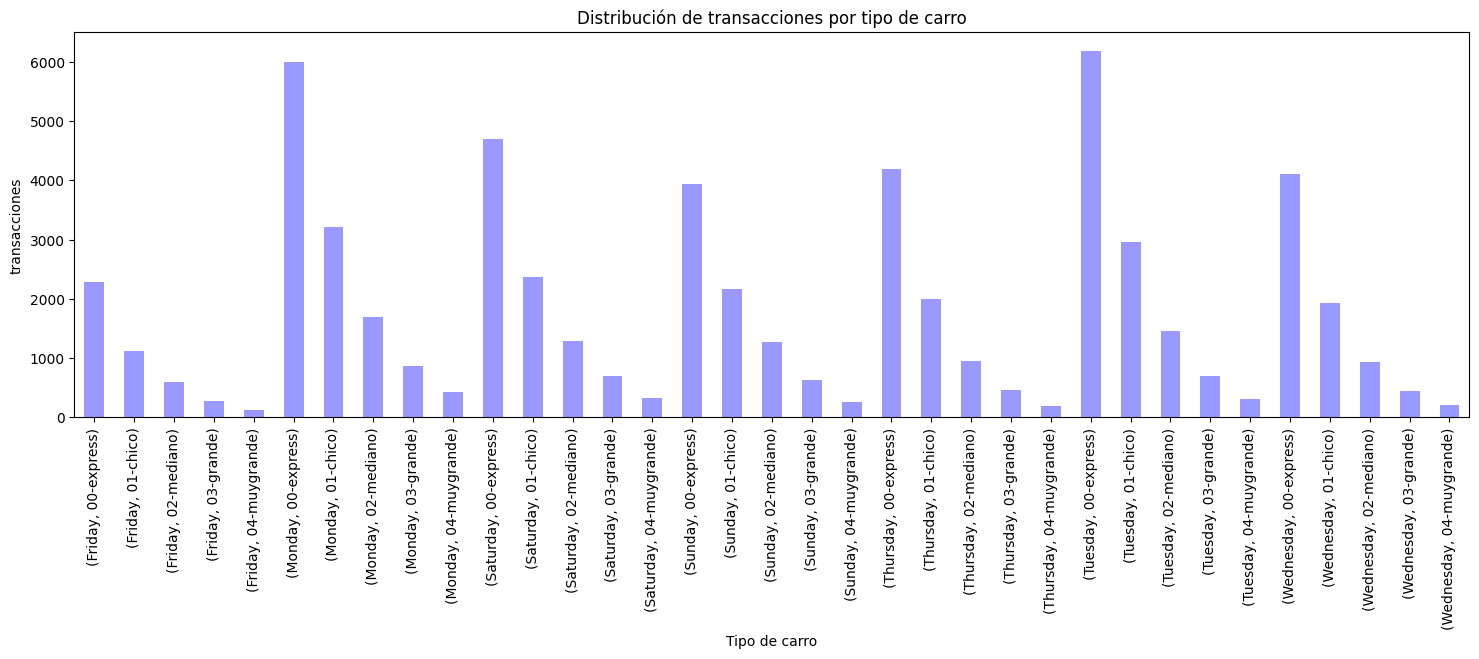

In [ ]:
df_55_carros = df_55.groupby(['day_week', 'tipo_carro']).count()['trx_id']

fig, ax = plt.subplots(figsize=(18, 5))

df_55_carros.plot.bar(alpha= 0.4, color='b', ylabel='transacciones', xlabel='Tipo de carro')
plt.title('Distribución de transacciones por tipo de carro')

**Distribución de transacciones por si supera el tiempo limite definido**

Text(0.5, 1.0, 'Distribución de transacciones por tipo de carro')

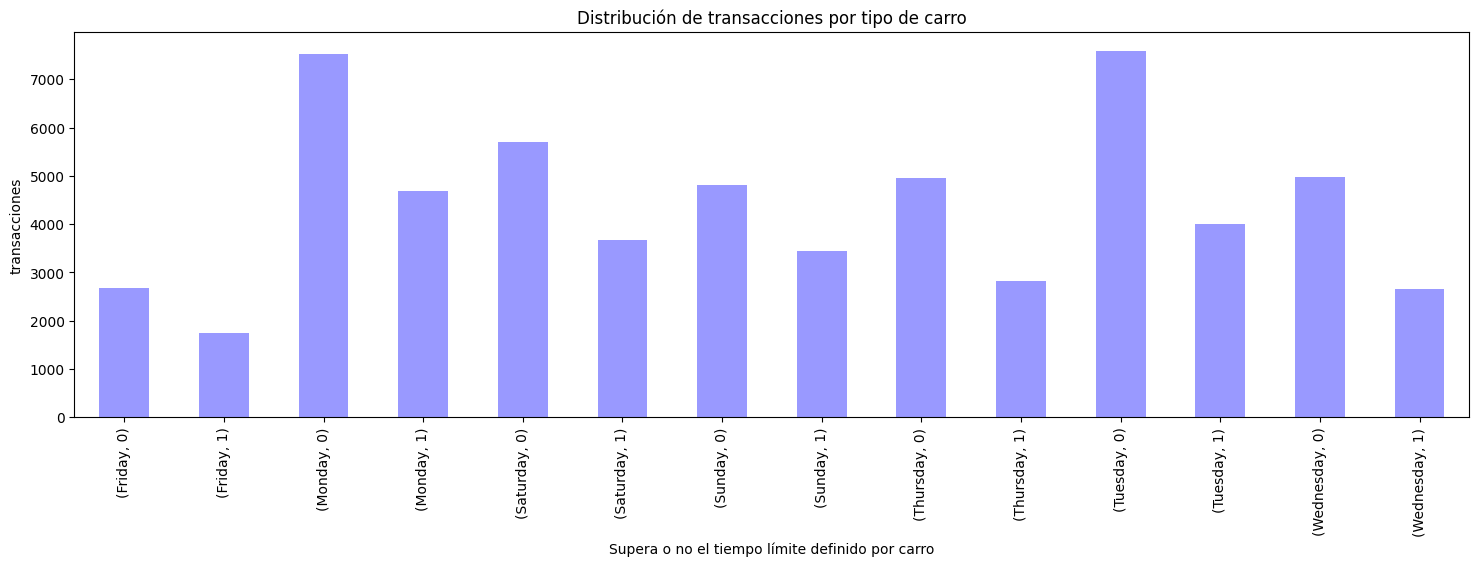

In [ ]:
df_55_alert = df_55.groupby(['day_week', 'alert_time']).count()['trx_id']

fig, ax = plt.subplots(figsize=(18, 5))

df_55_alert.plot.bar(alpha= 0.4, color='b', ylabel='transacciones', xlabel='Supera o no el tiempo límite definido por carro')
plt.title('Distribución de transacciones por tipo de carro')

**media de tiempos de transacciones por tipo de carros**

In [ ]:
#Tiempos Máximos por tipo de carro
val_express=1.51
val_chico=1.86
val_mediano=2.51
val_grande=3.77
val_muy_grande=5.02



df_55_time = df_55.groupby(['tipo_carro']).mean()['min_diff']
df_55_time

tipo_carro
00-express      1.363441
01-chico        2.091224
02-mediano      2.630476
03-grande       3.205296
04-muygrande    3.719171
Name: min_diff, dtype: float64

#4. Modeling estimate

**Librerías a utilizar**

In [ ]:
import random
import math
import numpy as np
semilla = 30

*Detalle de Cajeros*

In [ ]:
df_55.groupby(["terminal"]).mean()['min_diff']


NameError: ignored

**Acoto la data**

In [ ]:
df_55['time_between_trx'] = 0

#Filtro 1 día la caja N°3
#filter1 = df_55["trx_date"].isin(['2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05','2023-01-06', '2023-01-07', '2023-01-08'])
filter1 = df_55["trx_date"].isin(['2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08', '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12', '2023-01-15', '2023-01-14', '2023-01-14', '2023-01-15', '2023-01-16', '2023-01-17'])

#filter2 = df_55["terminal"].isin([3, 4, 15])
#filter3 = df_55["hour_nbr"].isin([10, 12, 13])

df_55_10h = df_55[filter1]
#df_55_10h = df_55_[filter2]

#Filtro las 3 horas a evaluar

#filter4 = df_55["hour_nbr"].isin([12])
#filter5 = df_55["hour_nbr"].isin([13])

#df_55_10h = df_55_[filter3]
#df_55_12h = df_55[filter4]
#df_55_13h = df_55[filter5]

**Estimación de tiempos en fila**

**Obtengo el tiempo entre transacción**

In [ ]:
lista=[]
hora_fin = ''
for i in range(len(df_55_10h)):
    #terminal = df_55_10h.iloc[i]['terminal']
    #print("terminal:", terminal)
    #print("Hora Ini:", hora_ini)
    #print("Hora fin:", hora_fin)
    #terminal_aux=terminal
    if i == 0:
      terminal = df_55_10h.iloc[i]['terminal']
      hour = df_55_10h.iloc[i]['hour_nbr']
      #fecha = df_55_10h.iloc[i]['trx_date']
      hora_ini = df_55_10h.iloc[i]['trxhora']
      print("i = 0")
      print("Hora Ini:", hora_ini)
      hora_fin=hora_ini
      print("Hora fin:", hora_fin)
      result = hora_ini-hora_fin
      print("Diff:", result)
      #print("hora_hora:", hora)
      #terminal_aux=terminal
    else:
      terminal_aux=terminal
      hour_aux=hour
      #fecha_aux=fecha
      terminal = df_55_10h.iloc[i]['terminal']
      hour = df_55_10h.iloc[i]['hour_nbr']
      #fecha = df_55_10h.iloc[i]['trx_date']
      print("Terminal_aux:", terminal_aux)
      print("Terminal:", terminal)
      #print("Fecha:", fecha)
      #print("Fecha_aux:", fecha_aux)
      if terminal==terminal_aux:
        if hour==hour_aux:
          hora_fin = df_55_10h.iloc[i]['trxhora']
          print("i > 1")
          print("Hora Ini:", hora_ini)
          result = hora_fin-hora_ini
          hora_ini=hora_fin
          print("Hora fin:", hora_fin)
          print("Diff:", result)
        else:
          print("Las horas no son iguales")
          hora_ini = df_55_10h.iloc[i]['trxhora']
      if terminal!=terminal_aux:
        print("Los terminal no son iguales")
        hora_ini = df_55_10h.iloc[i]['trxhora']
    lista.append(result)

#print(lista)

for i in range(len(df_55_10h)):
    df_55_10h['time_between_trx'] = lista

In [ ]:
df_55_10h.tail()

**Genero estimación del tiempo de llegada**

In [ ]:

df_55_10h['mean_time_between_trx'] = df_55_10h.groupby(["hour_nbr", "terminal", "trx_date"]).time_between_trx.transform(np.mean)


In [ ]:
df_55_10h.head(30)

In [ ]:
random.seed (semilla)


df_55_10h['time_arrival'] = 0

lista=[]
log_fin = 0

##IDENTIFICAR Solo el conjunto de datos que debo hacer la media.
##Terminal, y Hora
##Similar a la solución anterior.

for i in range(len(df_55_10h)):

  if i == 0:
      terminal = df_55_10h.iloc[i]['terminal']
      hour = df_55_10h.iloc[i]['hour_nbr']
      mean = df_55_10h.iloc[i]['mean_time_between_trx']
      #print(mean)
      r = random.random()
      log_ini = (math.log(r) * -(mean)) + log_fin
      log_fin = log_ini
      print(log_ini)
      #lista.append(log_ini)
  else:
    terminal_aux=terminal
    hour_aux=hour
    terminal = df_55_10h.iloc[i]['terminal']
    hour = df_55_10h.iloc[i]['hour_nbr']
    if terminal==terminal_aux:
      if hour==hour_aux:
        #mean = df_55_10h['time_between_trx'].mean() ## Dereepente una especie de partition BY de SQL en Python me viene bien.
        mean = df_55_10h.iloc[i]['mean_time_between_trx']
        #print(mean)
        r = random.random()
        log_ini = (math.log(r) * -(mean)) + log_fin
        log_fin = log_ini
        print("Hora",hour_aux)
        print("Hora",hour)
        print(log_ini)
      if hour!=hour_aux:
        print("Las horas no son iguales")
        mean = df_55_10h.iloc[i]['mean_time_between_trx']
        r = random.random()
        log_fin = 0
        log_ini = (math.log(r) * -(mean)) + log_fin
    if terminal!=terminal_aux:
        print("Los terminal no son iguales")
        mean = df_55_10h.iloc[i]['mean_time_between_trx']
        r = random.random()
        log_fin = 0
        log_ini = (math.log(r) * -(mean)) + log_fin
  lista.append(log_ini)

for i in range(len(df_55_10h)):
    df_55_10h['time_arrival'] = lista

In [ ]:
df_55_10h.head(20)

**Genero estimación de tiempo de servicio**

In [ ]:
df_55_10h['min_service'] = df_55_10h.groupby(["hour_nbr", "terminal", "trx_date"]).min_diff.transform(np.min)
df_55_10h['max_service'] = df_55_10h.groupby(["hour_nbr", "terminal", "trx_date"]).min_diff.transform(np.max)

In [ ]:
df_55_10h['time_service'] = 0

lista=[]

for i in range(len(df_55_10h)):
  r = random.random()
  #print(numero)
  #min = df_55_10h['min_diff'].min()
  min = df_55_10h.iloc[i]['min_service']
  #max = df_55_10h['min_diff'].max()
  max = df_55_10h.iloc[i]['max_service']
  #print(min)
  #print(max)
  time = (min+(max-min)) * r
  print('the time service is:', time)
  lista.append(time)

for i in range(len(df_55_10h)):
    df_55_10h['time_service'] = lista

**Genero estimación de tiempo espera**

In [ ]:
df_55_10h['time_exit'] = 0
df_55_10h['time_waiting'] = 0
lista1=[]
lista2=[]

for i in range(len(df_55_10h)):
  if i == 0:
    terminal = df_55_10h.iloc[i]['terminal']
    hour = df_55_10h.iloc[i]['hour_nbr']
    tiempo_llegada = df_55_10h.iloc[i]['time_arrival']
    print('llegada', tiempo_llegada)
    tiempo_servicio = df_55_10h.iloc[i]['time_service']
    print('servicio', tiempo_servicio)
    tiempo_espera = 0
    print('espera', tiempo_espera)
    tiempo_salida = tiempo_llegada + tiempo_servicio + tiempo_espera
    print('salida',tiempo_salida)
  if i > 0:
    terminal_aux=terminal
    hour_aux=hour
    terminal = df_55_10h.iloc[i]['terminal']
    hour = df_55_10h.iloc[i]['hour_nbr']
    if terminal==terminal_aux:
      if hour==hour_aux:
        print('Fila >1')
        tiempo_salida_ant=tiempo_salida
        print('Salida', tiempo_salida_ant)
        tiempo_llegada = df_55_10h.iloc[i]['time_arrival']
        print('llegada', tiempo_llegada)
        tiempo_servicio = df_55_10h.iloc[i]['time_service']
        print('servicio', tiempo_servicio)
        tiempo_espera = tiempo_salida_ant - tiempo_llegada
        print('espera', tiempo_espera)
        tiempo_salida = tiempo_llegada + tiempo_servicio + tiempo_espera
        print('salida',tiempo_salida)
      if hour!=hour_aux:
        tiempo_salida_ant=tiempo_salida
        print('Salida', tiempo_salida_ant)
        tiempo_llegada = df_55_10h.iloc[i]['time_arrival']
        print('llegada', tiempo_llegada)
        tiempo_servicio = df_55_10h.iloc[i]['time_service']
        print('servicio', tiempo_servicio)
        print('Hora distinta')
        tiempo_espera = 0
        tiempo_salida = tiempo_llegada + tiempo_servicio + tiempo_espera
    if terminal!=terminal_aux:
      tiempo_salida_ant=tiempo_salida
      print('Salida', tiempo_salida_ant)
      tiempo_llegada = df_55_10h.iloc[i]['time_arrival']
      print('llegada', tiempo_llegada)
      tiempo_servicio = df_55_10h.iloc[i]['time_service']
      print('servicio', tiempo_servicio)
      print('Hora distinta')
      tiempo_espera = 0
      tiempo_salida = tiempo_llegada + tiempo_servicio + tiempo_espera
  lista1.append(tiempo_espera)
  lista2.append(tiempo_salida)

for i in range(len(df_55_10h)):
    df_55_10h['time_exit'] = lista2
    df_55_10h['time_waiting'] = lista1



**Calculos finales de estimación de cola y tiempo promedio**

In [ ]:
df_55_10h['sum_waiting'] = df_55_10h.groupby(["hour_nbr", "terminal", "trx_date"]).time_waiting.transform(np.sum)
df_55_10h['max_exit'] = df_55_10h.groupby(["hour_nbr", "terminal", "trx_date"]).time_exit.transform(np.max)
df_55_10h['count_'] = df_55_10h.groupby(["hour_nbr", "terminal", "trx_date"]).time_waiting.transform(len)
df_55_10h['estimacion_fila'] = df_55_10h['sum_waiting'] / df_55_10h['max_exit']
df_55_10h['estimacion_tiempo_espera'] = df_55_10h['sum_waiting'] / df_55_10h['count_']


Creo variable Nivel de tiempo en caja, Si supera el tiempo establecido máximo para Lider, =1, sino lo supera =0.

In [ ]:
var_def=7.62
df_55_10h['NTC_A'] = 0
df_55_10h['estimacion_fila_corre'] = 0
df_55_10h['estimacion_tiempo_corre'] = 0

lista1=[]
lista2=[]
lista3=[]
for i in range(len(df_55_10h)):
  if i >= 0:
      estimacion_tiempo_espera = df_55_10h.iloc[i]['estimacion_tiempo_espera']
      estimacion_fila = df_55_10h.iloc[i]['estimacion_fila']
      if estimacion_tiempo_espera > var_def:
          var=1
      else:
          var=0

      if estimacion_fila < 0:
        corre_1 = 0
      else:
        corre_1= estimacion_fila

      if estimacion_tiempo_espera < 0:
        corre_2 = 0
      else:
        corre_2= estimacion_tiempo_espera

  lista1.append(var)
  lista2.append(corre_1)
  lista3.append(corre_2)


for i in range(len(df_55_10h)):
    df_55_10h['NTC_A'] = lista1
    df_55_10h['estimacion_fila_corre'] = lista2
    df_55_10h['estimacion_tiempo_corre'] = lista3


In [ ]:
df_55_10h.head(40)

In [ ]:
df_55_10h.to_csv('df_55_10h.csv', index = False)

#5. Modeling Regression

##Librerias

In [ ]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Lineal Regression
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Decision Tree Regressor

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

##Lectura de datos

In [ ]:
url_data= {
  "df":'https://drive.google.com/file/d/13nlY4fUtaz0B0uB64XCrem0AlWJoHG3n/view?usp=sharing'
}

In [ ]:
# get all files
for url in url_data.values():
  id = url.split("/")[5]
  !gdown $id

Downloading...
From: https://drive.google.com/uc?id=13nlY4fUtaz0B0uB64XCrem0AlWJoHG3n
To: /content/df_55_10h.csv
100% 21.5M/21.5M [00:00<00:00, 124MB/s]


In [ ]:
df = pd.read_csv("df_55_10h.csv")

In [ ]:
df

,trx_date,store_nbr,hour_nbr,trxhora,terminal,terminal_type,formato,comuna,sales_unit_qty,sales_retail_amt,...,time_exit,time_waiting,sum_waiting,max_exit,count_,estimacion_fila,estimacion_tiempo_espera,NTC_A,estimacion_fila_corre,estimacion_tiempo_corre
0,2023-01-02,55,10,1029,3,POS,819 LIDER,MACUL,5.00,16110,...,3.561100,0.000000,-96.375018,21.391854,10,-4.50522,-9.637502,0,0.00000,0.000000
1,2023-01-02,55,10,1034,3,POS,819 LIDER,MACUL,1.00,21000,...,4.883797,-1.642805,-96.375018,21.391854,10,-4.50522,-9.637502,0,0.00000,0.000000
2,2023-01-02,55,10,1036,3,POS,819 LIDER,MACUL,6.00,17009,...,8.255128,-10.135027,-96.375018,21.391854,10,-4.50522,-9.637502,0,0.00000,0.000000
3,2023-01-02,55,10,1044,3,POS,819 LIDER,MACUL,5.00,10093,...,8.586676,-7.954270,-96.375018,21.391854,10,-4.50522,-9.637502,0,0.00000,0.000000
4,2023-01-02,55,10,1045,3,POS,819 LIDER,MACUL,16.00,39430,...,11.241802,-11.992420,-96.375018,21.391854,10,-4.50522,-9.637502,0,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61293,2023-01-17,55,21,2112,94,SCO,819 LIDER,MACUL,2.00,3361,...,22.038196,3.095434,45.033378,29.333119,9,1.53524,5.003709,0,1.53524,5.003709
61294,2023-01-17,55,21,2113,94,SCO,819 LIDER,MACUL,1.00,681,...,24.900239,1.575176,45.033378,29.333119,9,1.53524,5.003709,0,1.53524,5.003709
61295,2023-01-17,55,21,2116,94,SCO,819 LIDER,MACUL,11.00,13503,...,26.406563,3.011350,45.033378,29.333119,9,1.53524,5.003709,0,1.53524,5.003709
61296,2023-01-17,55,21,2119,94,SCO,819 LIDER,MACUL,39.41,100628,...,26.816514,4.251788,45.033378,29.333119,9,1.53524,5.003709,0,1.53524,5.003709


##correlación

In [ ]:
df.columns

Index(['trx_date', 'store_nbr', 'hour_nbr', 'trxhora', 'terminal',
       'terminal_type', 'formato', 'comuna', 'sales_unit_qty',
       'sales_retail_amt', 'trx_id', 'scan_time', 'tender_time',
       'inactive_time', 'time_total', 'min_diff', 'tipo_carro', 'alert_time',
       'alert_time_max', 'jeg_caja', 'day_week', 'time_between_trx',
       'mean_time_between_trx', 'time_arrival', 'min_service', 'max_service',
       'time_service', 'time_exit', 'time_waiting', 'sum_waiting', 'max_exit',
       'count_', 'estimacion_fila', 'estimacion_tiempo_espera', 'NTC_A',
       'estimacion_fila_corre', 'estimacion_tiempo_corre'],
      dtype='object')

In [ ]:
corr = df[['hour_nbr', 'terminal', 'sales_unit_qty', 'sales_retail_amt', 'scan_time', 'tender_time',
'inactive_time', 'time_total', 'jeg_caja', 'time_between_trx', 'time_arrival',
'time_service', 'time_exit', 'time_waiting', 'NTC_A', 'estimacion_fila_corre', 'estimacion_tiempo_corre']]

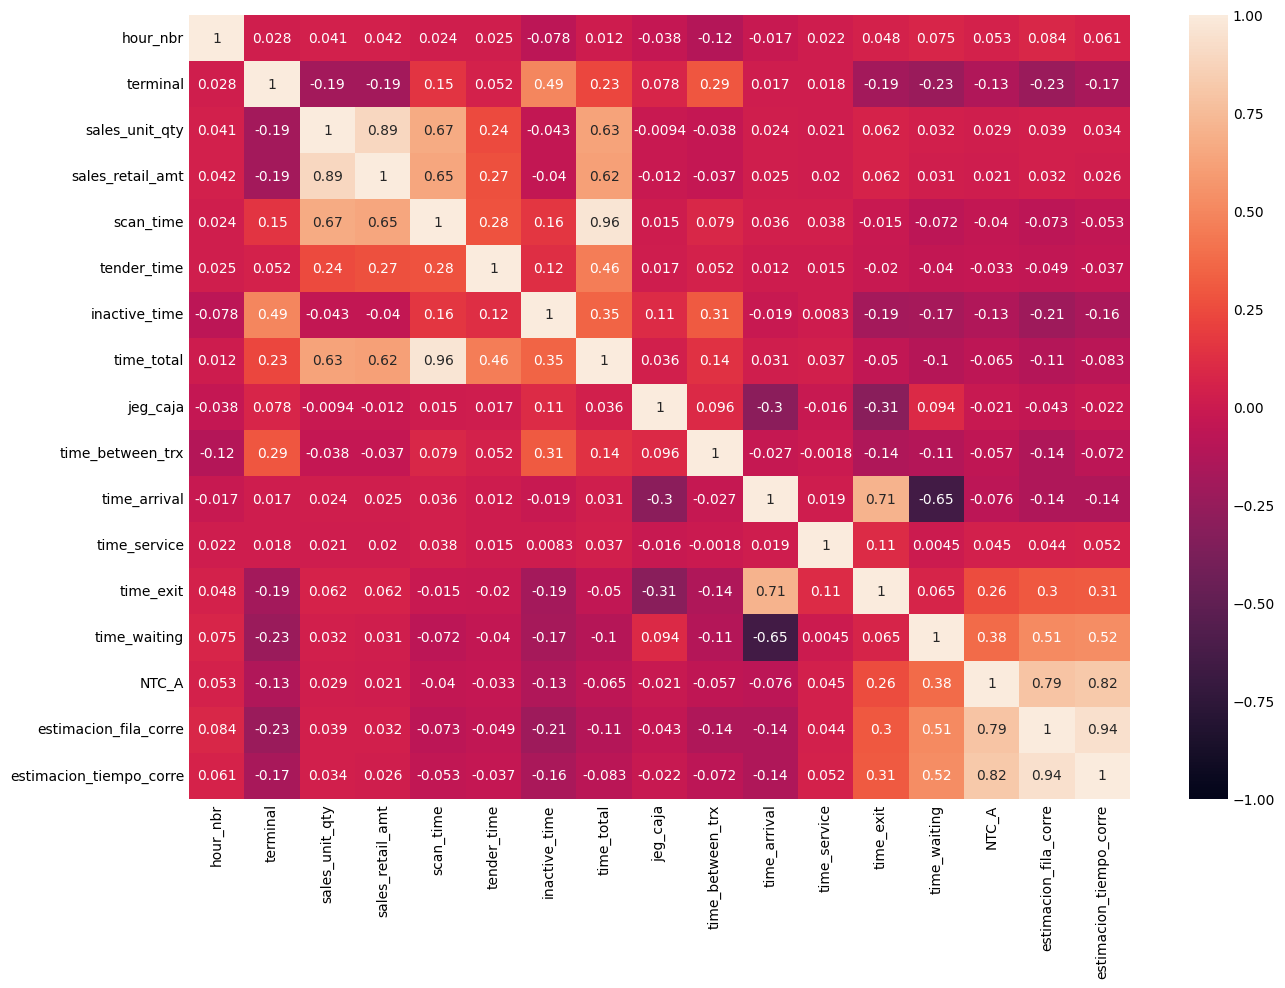

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr.corr(), annot=True, vmin=-1, vmax=1);

In [ ]:
corr_test = pearsonr(x = corr['sales_unit_qty'], y =  corr['time_total'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.6299617984280595
P-value:  0.0


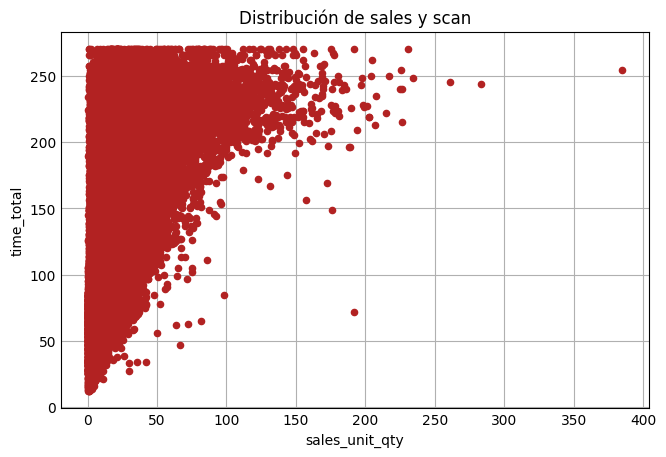

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3.84))

corr.plot(
    x    = 'sales_unit_qty',
    y    = 'time_total',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución de sales y scan');

##implementación regresión Lineal

**Separación de los datos**

In [ ]:
X = corr[['sales_unit_qty', 'time_total', 'hour_nbr', 'time_service', 'NTC_A', 'estimacion_tiempo_corre']]
y = corr['estimacion_fila_corre']

In [ ]:
# División de los datos en train y test
# ==============================================================================

labels = corr.loc[:, "estimacion_fila_corre"]

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.33,
                                        random_state = 40,
                                        shuffle      = True,
                                        stratify=labels
                                    )

In [ ]:
y_test.head(20)

30700    5.589925
4562     0.025976
3732     0.000000
57649    0.000000
13648    0.000000
21646    0.351996
9259     0.000000
52023    2.640345
27399    3.385137
11303    0.000000
13016    0.000000
14248    0.000000
60158    0.000000
19006    0.601339
27893    0.176353
27964    0.000000
39507    0.000000
52152    0.000000
6289     5.169135
27176    0.000000
Name: estimacion_fila_corre, dtype: float64

**Implementación Modelo**

In [ ]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(X_train, y_train)
modelo.score(X_test, y_test)

0.8932170661084659

In [ ]:
y_pred_lineal = modelo.predict(X_test)

In [ ]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred_lineal.squeeze()})
print(df_preds)

         Actual  Predicted
30700  5.589925   5.569599
4562   0.025976   0.072743
3732   0.000000  -0.017444
57649  0.000000   0.054608
13648  0.000000   0.186702
...         ...        ...
12659  0.000000   0.002640
18894  0.545484   0.279697
48139  0.417952   0.382599
3725   0.000000  -0.119990
33313  4.719188   5.139724

[41070 rows x 2 columns]


In [ ]:
from sklearn.metrics import mean_absolute_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred_lineal)

print(f'Mean absolute error: {mae:.2f}')


Mean absolute error: 0.22


In [ ]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred_lineal)

0.8932170661084659

##Implementación regresión Lineal multiple OLS

**Separación de los datos**

In [ ]:
# División de los datos en train y test
# ==============================================================================


labels = corr.loc[:, "estimacion_fila_corre"]

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.33,
                                        random_state = 40,
                                        shuffle      = True,
                                        stratify=labels
                                    )

**Implementación modelo**

In [ ]:
##Ordinary Least Squares
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                              OLS Regression Results                             
Dep. Variable:     estimacion_fila_corre   R-squared:                       0.893
Model:                               OLS   Adj. R-squared:                  0.893
Method:                    Least Squares   F-statistic:                 2.826e+04
Date:                   Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                           23:42:13   Log-Likelihood:                -15741.
No. Observations:                  20228   AIC:                         3.150e+04
Df Residuals:                      20221   BIC:                         3.155e+04
Df Model:                              6                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

##Implementación Decision Tree Regressor


**Separción de los datos**

In [ ]:
# División de los datos en train y test
# ==============================================================================


labels = corr.loc[:, "estimacion_fila_corre"]

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.33,
                                        random_state = 40,
                                        shuffle      = True,
                                        stratify=labels
                                    )

In [ ]:
X_test

,sales_unit_qty,time_total,hour_nbr,time_service,NTC_A,estimacion_tiempo_corre
30700,1.00,38.0,20,3.995333,1,13.105145
4562,5.00,86.0,13,2.070543,0,0.051409
3732,5.27,128.0,14,3.058759,0,0.000000
57649,12.62,89.0,11,1.992672,0,0.000000
13648,4.00,49.0,18,0.387763,0,0.000000
...,...,...,...,...,...,...
12659,33.00,215.2,20,3.768093,0,0.000000
18894,22.44,230.0,14,1.196493,0,1.038149
48139,2.00,96.0,21,2.043325,0,0.677173
3725,11.60,195.0,14,3.852084,0,0.000000


**Implementación del modelo**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
modelo = DecisionTreeRegressor()
modelo.fit(X_train, y_train)
modelo.score(X_test, y_test)

0.9638177276965473

In [ ]:
y_pred_dtr = modelo.predict(X_test)

In [ ]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred_dtr.squeeze()})
print(df_preds)

         Actual  Predicted
30700  5.589925   5.589925
4562   0.025976   0.025976
3732   0.000000   0.000000
57649  0.000000   0.000000
13648  0.000000   0.000000
...         ...        ...
12659  0.000000   0.000000
18894  0.545484   0.545484
48139  0.417952   0.417952
3725   0.000000   0.000000
33313  4.719188   4.741038

[41070 rows x 2 columns]


In [ ]:
from sklearn.metrics import mean_absolute_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred_dtr)

print(f'Mean absolute error: {mae:.2f}')


Mean absolute error: 0.05


In [ ]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred_dtr)

0.9638177276965473

##Implementación SGDRegressor

In [ ]:
# División de los datos en train y test
# ==============================================================================


labels = corr.loc[:, "estimacion_fila_corre"]

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.33,
                                        random_state = 40,
                                        shuffle      = True,
                                        stratify=labels
                                    )

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
modelo = SGDRegressor(random_state=10, learning_rate='invscaling', max_iter=1000)
modelo.fit(X_train, y_train)
modelo.score(X_test, y_test)

-1.4860808365211087e+25

In [ ]:
y_pred_sgd = modelo.predict(X_test)

In [ ]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred_sgd.squeeze()})
print(df_preds)

         Actual     Predicted
30700  5.589925  1.821783e+12
4562   0.025976  4.182632e+12
3732   0.000000  6.232157e+12
57649  0.000000  4.305902e+12
13648  0.000000  2.385024e+12
...         ...           ...
12659  0.000000  1.041201e+13
18894  0.545484  1.117310e+13
48139  0.417952  4.683076e+12
3725   0.000000  9.486028e+12
33313  4.719188  4.049669e+12

[41070 rows x 2 columns]


In [ ]:
from sklearn.metrics import mean_absolute_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred_sgd)

print(f'Mean absolute error: {mae:.2f}')


Mean absolute error: 5562497001298.01


In [ ]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred_sgd)

-1.4860808365211087e+25

##Implementación Modelo Dummy

In [ ]:
from sklearn.dummy import DummyRegressor

dummy_reg = DummyRegressor()

dummy_reg.fit(X_train, y_train)
dummy_reg.score(X_test, y_test)


-2.1501948493707346e-05

In [ ]:
y_pred_dummy = dummy_reg.predict(X_test)
y_pred_dummy

array([0.82262855, 0.82262855, 0.82262855, ..., 0.82262855, 0.82262855,
       0.82262855])

In [ ]:
df_preds_dummy = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred_dummy.squeeze()})
print(df_preds_dummy)

         Actual  Predicted
30700  5.589925   0.822629
4562   0.025976   0.822629
3732   0.000000   0.822629
57649  0.000000   0.822629
13648  0.000000   0.822629
...         ...        ...
12659  0.000000   0.822629
18894  0.545484   0.822629
48139  0.417952   0.822629
3725   0.000000   0.822629
33313  4.719188   0.822629

[41070 rows x 2 columns]


In [ ]:
from sklearn.metrics import mean_absolute_error
import numpy as np

mae_dummy = mean_absolute_error(y_test, y_pred_dummy)

print(f'Mean absolute error: {mae_dummy:.2f}')

Mean absolute error: 1.17


In [ ]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred_dummy)

-2.1501948493707346e-05

##Visualización Predicciones

In [ ]:
df_predicho = X_test

In [ ]:
y_test

30700    5.589925
4562     0.025976
3732     0.000000
57649    0.000000
13648    0.000000
           ...   
12659    0.000000
18894    0.545484
48139    0.417952
3725     0.000000
33313    4.719188
Name: estimacion_fila_corre, Length: 41070, dtype: float64

In [ ]:
for i in range(len(df_predicho)):
    df_predicho['y_test'] = y_test

In [ ]:
for i in range(len(df_predicho)):
    df_predicho['y_pred_lineal'] = y_pred_lineal

In [ ]:
df_predicho

,sales_unit_qty,time_total,hour_nbr,time_service,NTC_A,estimacion_tiempo_corre,y_test,y_pred_lineal
30700,1.00,38.0,20,3.995333,1,13.105145,5.589925,5.569599
4562,5.00,86.0,13,2.070543,0,0.051409,0.025976,0.072743
3732,5.27,128.0,14,3.058759,0,0.000000,0.000000,-0.017444
57649,12.62,89.0,11,1.992672,0,0.000000,0.000000,0.054608
13648,4.00,49.0,18,0.387763,0,0.000000,0.000000,0.186702
...,...,...,...,...,...,...,...,...
12659,33.00,215.2,20,3.768093,0,0.000000,0.000000,0.002640
18894,22.44,230.0,14,1.196493,0,1.038149,0.545484,0.279697
48139,2.00,96.0,21,2.043325,0,0.677173,0.417952,0.382599
3725,11.60,195.0,14,3.852084,0,0.000000,0.000000,-0.119990


**Filtro de predicciones**

In [ ]:
df_predicho[(df_predicho["y_test"] >= 11)]

,sales_unit_qty,time_total,hour_nbr,time_service,NTC_A,estimacion_tiempo_corre,y_test,y_pred_lineal
46717,12.10,83.0,12,1.317997,1,21.325987,11.220598,8.658622
46743,9.36,86.0,12,2.216653,1,21.325987,11.220598,8.636801
46750,32.33,130.0,12,0.054893,1,21.325987,11.220598,8.661429
46746,25.51,157.0,12,0.480310,1,21.325987,11.220598,8.581268
46745,2.00,25.0,12,2.519781,1,21.325987,11.220598,8.717835
46716,20.77,122.0,12,0.961310,1,21.325987,11.220598,8.623913
46751,2.00,46.0,12,1.973314,1,21.325987,11.220598,8.682106
46737,2.00,23.0,12,3.223188,1,21.325987,11.220598,8.717546
46724,3.00,60.0,12,0.697476,1,21.325987,11.220598,8.667534
46728,52.24,125.0,12,1.350518,1,21.325987,11.220598,8.744570


**Distribución de predicciones**

(array([3.2391e+04, 4.9100e+03, 2.2770e+03, 1.1650e+03, 1.8900e+02,
        1.0900e+02, 8.0000e+00, 5.0000e+00, 9.0000e+00, 7.0000e+00]),
 array([-0.32999314,  1.38992405,  3.10984124,  4.82975843,  6.54967562,
         8.26959281,  9.98951   , 11.70942719, 13.42934438, 15.14926157,
        16.86917876]),
 <BarContainer object of 10 artists>)

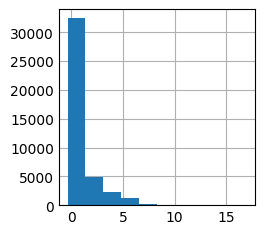

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Semilla para reproducibilidad
np.random.seed(4)

# Simulación de datos
x = df_predicho["y_pred_lineal"]

# Histograma
fig, ax = plt.subplots()
ax.hist(x)
##plt.show()

**Fallo del modelo**

In [ ]:
fallo = df_predicho
fallo['fallo'] = fallo['y_test'] - fallo['y_pred_lineal']
#fallo
fallo[(fallo['fallo'] <= -12)]
#fallo.sort_values('fallo')


,sales_unit_qty,time_total,hour_nbr,time_service,NTC_A,estimacion_tiempo_corre,y_test,y_pred_lineal,fallo
12137,6.00,169.0,11,1.280559,1,42.530200,3.649827,16.737369,-13.087542
61069,3.00,104.0,11,0.809146,1,41.111007,1.879846,16.294172,-14.414326
12133,8.00,99.0,11,2.299376,1,42.530200,3.649827,16.869179,-13.219352
61068,1.26,86.0,11,0.127490,1,41.111007,1.879846,16.324217,-14.444371
12136,3.67,103.0,11,0.516176,1,42.530200,3.649827,16.854224,-13.204397
61070,4.56,103.0,11,0.325419,1,41.111007,1.879846,16.305129,-14.425282
12135,5.00,110.0,11,0.583845,1,42.530200,3.649827,16.846324,-13.196498


#TO DO:


* Trabajar un One hot Onecoding para los días de semana
* Averiguar como acceder al modelo de Forecasting para la semana entrante.
* Tiempo waiting debo preguntar si es < 0 = 0, sino positivo



* time_between_trx Revisar los cambios de hora y trx, aparece un numero que no tiendo mucho.

* Revisar por que hay comunas "No definidas" ⛔

* Revisar distribución de los datos para MACUL :
  * * Normalización de datos
  * * Clustering
  * * Reducción de dimensionalidad
* Detectar situaciones anómalas a la hora de pagar, debería ser más estándar?
* **¿La pregunta del millon es cuantas cajas necesito para poder atender a toda mi demanda?** ❗
* Investigar apply() en python, es más eficiente que ciclos for sobre un dataframe
* Análisis respuesta de pablo respecto el cálculo del NTC (%) ⛔
* Tomar la estimación de personas output datalab, y hacer ejercicio con mi código. El problema es que ellos lo entregan agrupado cada 15 min, y mis transacciones son todas, cada minuto.
* Tratar de ir a medir a sala la estimación de largo de Fila de Datalab.
* Volver a leer mi proyecto de seminario de título
* ver los datos no agrupados cada 15 min, me permite analizar todos los tipos de carros, en función de sus tiempos



**Documentación**

1. **Error absoluto medio (MAE)**: Cuando restamos los valores predichos de los valores reales, obteniendo los errores, sumamos los valores absolutos de esos errores y obtenemos su media. Esta métrica da una noción del error global para cada predicción del modelo, cuanto menor (más cercano a 0) mejor.

2. **R2_Score**: El coeficiente de determinación, determina la capacidad de un modelo para predecir futuros resultados. El mejor resultado posible es 1.0, y ocurre cuando la predicción coincide con los valores de la variable objetivo. R2 puede tomar valores negativos pues la predicción puede ser arbitrariamente mala. Cuando la predicción coincide con la esperanza de los valores de la variable objetivo, el resultado de R2 es 0. Se define como 1 menos la suma de cuadrados totales dividido por la suma de cuadrados de los residuos.

[documentación](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html).